Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/hectormejia/opt/anaconda3/envs/mcmt_env/lib/python3.9/site-packages/torch_geometric/typing.py:18: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: dlopen(/Users/hectormejia/opt/anaconda3/envs/mcmt_env/lib/python3.9/site-packages/libpyg.so, 0x0006): Library not loaded: /usr/local/opt/python@3.10/Frameworks/Python.framework/Versions/3.10/Python
  Referenced from: <593A788E-3AC3-3D15-B6FD-54CA34BBA4D5> /Users/hectormejia/opt/anaconda3/envs/mcmt_env/lib/python3.9/site-packages/libpyg.so
  Reason: tried: '/usr/local/opt/python@3.10/Frameworks/Python.framework/Versions/3.10/Python' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/python@3.10/Frameworks/Python.framework/Versions/3.10/Python' (no such file), '/usr/local/opt/python@3.10/Frameworks/Python.framework/Versions/3.10/Python' (no such file), '/Library/Frameworks/Python.framework/Versions/3.10/Python' (no such file), '/System/Library/Frameworks/Python.framework/Version

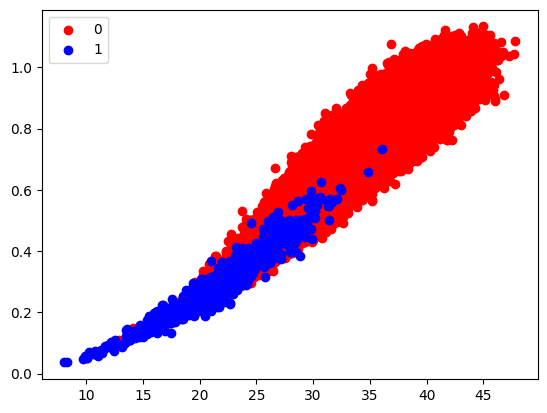

In [2]:
import torch
import matplotlib.pyplot as plt

graph = torch.load("/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/graphs/sequence_graph_S01.pt")
for label, color in zip([0,1], ["red", "blue"]):
    plt.scatter(graph.edge_attr[graph.edge_labels == label,0], graph.edge_attr[graph.edge_labels == label,1], c=color, label=label)
plt.legend()
plt.show()

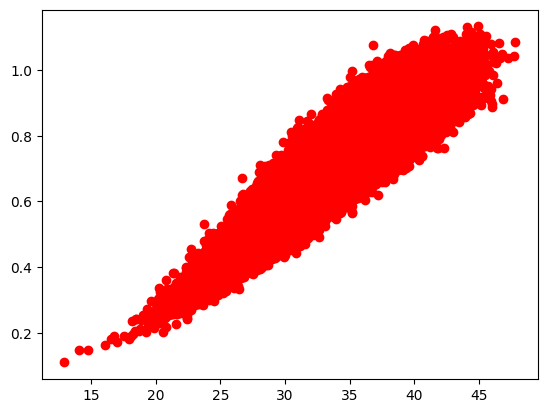

In [4]:
plt.scatter(graph.edge_attr[graph.edge_labels == 0,0], graph.edge_attr[graph.edge_labels == 0,1], c="red", label=label)

In [10]:
import pandas as pd
node_df = pd.read_json("/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/logs/S01/sequence_graph_nodes.json")
node_df.head()

,camera,object_id,embeddings_path,node_id
0,c002,33,datasets/AIC22/embeddings/S01/gt.txt/epoch_0/a...,0
1,c002,91,datasets/AIC22/embeddings/S01/gt.txt/epoch_0/a...,1
2,c002,56,datasets/AIC22/embeddings/S01/gt.txt/epoch_0/a...,2
3,c002,8,datasets/AIC22/embeddings/S01/gt.txt/epoch_0/a...,3
4,c002,17,datasets/AIC22/embeddings/S01/gt.txt/epoch_0/a...,4


In [11]:
edges_df = pd.read_json("/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/logs/S01/sequence_graph_edges.json")
edges_df.head()

,src_node_id,dst_node_id,src_obj_id,dst_obj_id,edge_labels
0,0,75,33,33,1
1,0,76,33,62,0
2,0,77,33,91,0
3,0,78,33,56,0
4,0,79,33,8,0


In [12]:
short_edges = edges_df.iloc[((graph.edge_attr[:,0] < 25) & (graph.edge_attr[:,1] < 0.4)).tolist()]
len(short_edges), len(edges_df)

(1313, 66803)

In [13]:
short_attr = graph.edge_attr[(graph.edge_attr[:,0] < 25) & (graph.edge_attr[:,1] < 0.4) ]
len(short_attr), len(graph.edge_attr)

(1313, 66803)

In [14]:
short_non_active_edges = short_attr[(short_edges.edge_labels == 0).to_list()]
short_df_non_active = short_edges.iloc[(short_edges.edge_labels == 0).to_list()]

In [16]:
c2_s1_gt = pd.read_csv("/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/annotations/S01/c002/gt.txt")

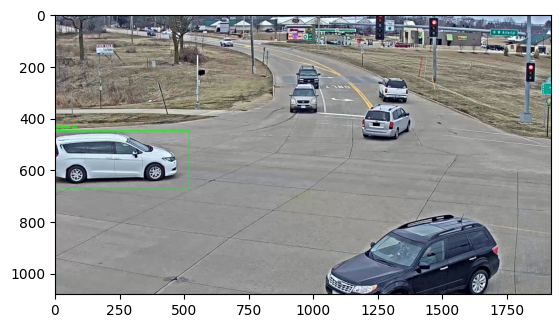

In [17]:
import cv2

img = cv2.imread(f"/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/frames/S01/c002/{str(c2_s1_gt[c2_s1_gt.id == 91].frame.values[1]).zfill(6)}.jpg")
xmin, xmax, ymin, ymax, subject_id = c2_s1_gt[c2_s1_gt.id == 91].iloc[1][["xmin", "xmax", "ymin", "ymax", "id"]]
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
cv2.putText(img, f"Subject {subject_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(img)

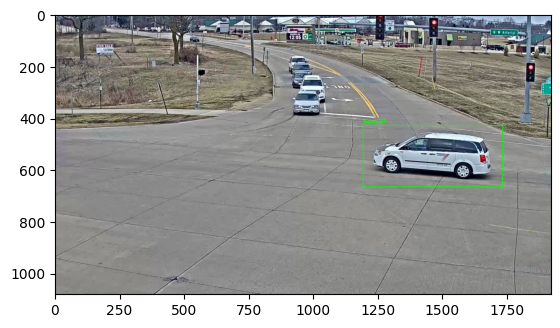

In [18]:
img = cv2.imread(f"/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/frames/S01/c002/{str(c2_s1_gt[c2_s1_gt.id == 67].frame.values[1]).zfill(6)}.jpg")
xmin, xmax, ymin, ymax, subject_id = c2_s1_gt[c2_s1_gt.id == 67].iloc[1][["xmin", "xmax", "ymin", "ymax", "id"]]
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
cv2.putText(img, f"Subject {subject_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(img)


In [22]:
len(short_non_active_edges), len(graph.edge_labels[graph.edge_labels == 1])

(758, 716)

In [ ]:
from sklearn.manifold import TSNE
x_2 = TSNE().fit_transform(graph.x)


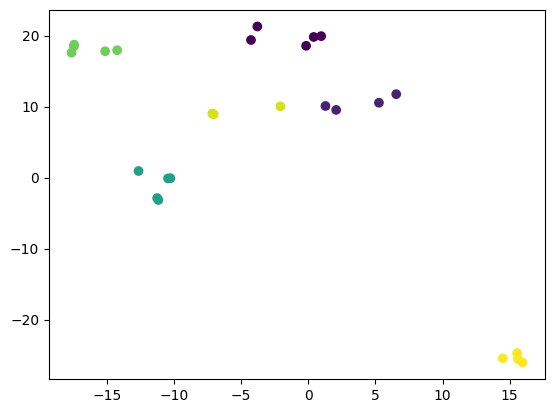

In [39]:
plt.scatter(x_2[torch.isin(graph.y,torch.tensor([33, 86, 27, 76, 63, 90])),0], x_2[torch.isin(graph.y,torch.tensor([33, 86, 27, 76, 63, 90])),1], c=graph.y[torch.isin(graph.y,torch.tensor([33, 86, 27, 76, 63, 90]))])

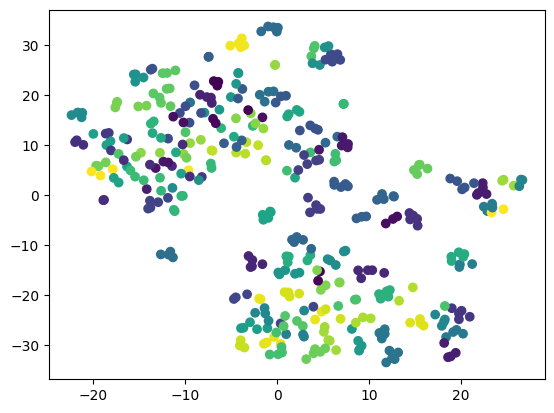

In [40]:
plt.scatter(x_2[:,0], x_2[:,1], c=graph.y)

In [ ]:
graph_test = torch.load("/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/graphs/sequence_graph_S02.pt")
x_2_test = TSNE().fit_transform(graph_test.x)


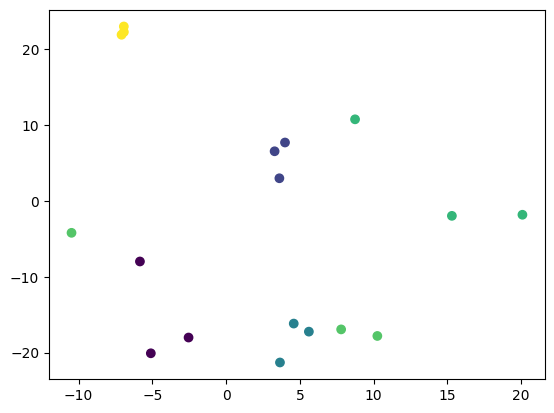

In [53]:
plt.scatter(x_2_test[torch.isin(graph_test.y,torch.tensor([ 107, 234, 133, 162, 191, 200])),0], x_2_test[torch.isin(graph_test.y,torch.tensor([ 107, 234, 133, 162, 191, 200])),1], c=graph_test.y[torch.isin(graph_test.y,torch.tensor([ 107, 234, 133, 162, 191, 200]))])

In [55]:
import numpy as np

In [ ]:
graph_s3 = torch.load("/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/graphs/sequence_graph_S03.pt")
graph_s4 = torch.load("/Users/hectormejia/Documents/TFM/mcmt_gnn/datasets/AIC22/graphs/sequence_graph_S04.pt")

x_2_s3 = TSNE().fit_transform(graph_s3.x)
labels_s3 = np.random.choice(graph_s3.y.numpy(), size=6)
x_2_s4 = TSNE().fit_transform(graph_s4.x)
labels_s4 = np.random.choice(graph_s4.y.numpy(), size=6)


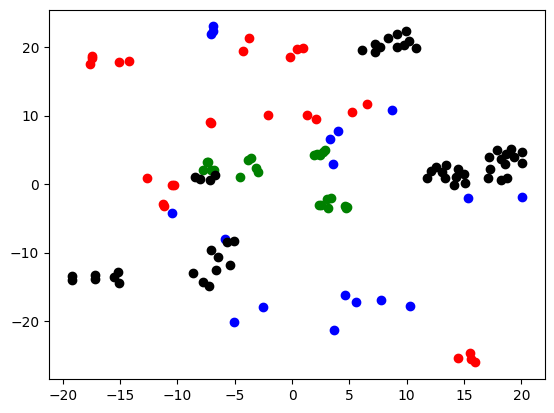

In [60]:
plt.scatter(x_2[torch.isin(graph.y,torch.tensor([33, 86, 27, 76, 63, 90])),0], x_2[torch.isin(graph.y,torch.tensor([33, 86, 27, 76, 63, 90])),1], c="red")
plt.scatter(x_2_test[torch.isin(graph_test.y,torch.tensor([ 107, 234, 133, 162, 191, 200])),0], x_2_test[torch.isin(graph_test.y,torch.tensor([ 107, 234, 133, 162, 191, 200])),1], c="blue")
plt.scatter(x_2_s3[torch.isin(graph_s3.y,torch.tensor(labels_s3)),0], x_2_s3[torch.isin(graph_s3.y,torch.tensor(labels_s3)),1], c="green")
plt.scatter(x_2_s4[torch.isin(graph_s4.y,torch.tensor(labels_s4)),0], x_2_s4[torch.isin(graph_s4.y,torch.tensor(labels_s4)),1], c="black")

